16BCE1259

Shushil Kumar Ravishankar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('clean_bmart.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
corrmatrix = df.corr()
corrmatrix.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


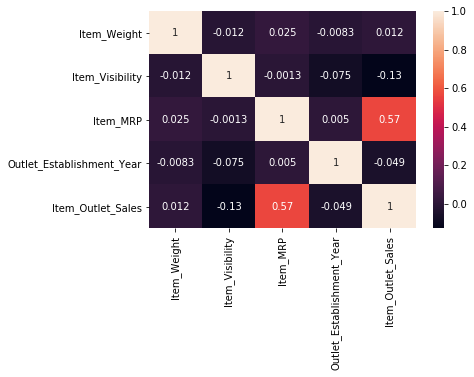

In [4]:
sb.heatmap(corrmatrix, annot=True)

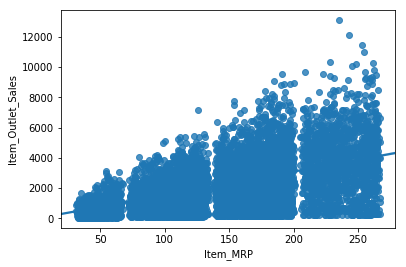

In [5]:

sb.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

In [6]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [7]:
x = df[['Item_MRP']].values
y = df['Item_Outlet_Sales'].values

xa_train, xa_test, ya_train, ya_test = train_test_split(x, y, test_size=0.3)

lreg = LinearRegressionGD()
lreg.fit(x, y)

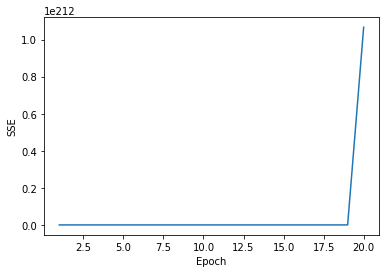

In [8]:
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3)

lreg = LinearRegressionGD()
lreg.fit(x_std, y_std)

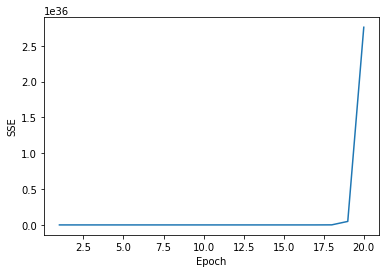

In [10]:
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

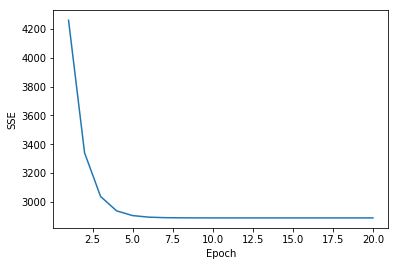

In [11]:
lreg = LinearRegressionGD(eta=0.00005)
lreg.fit(x_std, y_std)
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

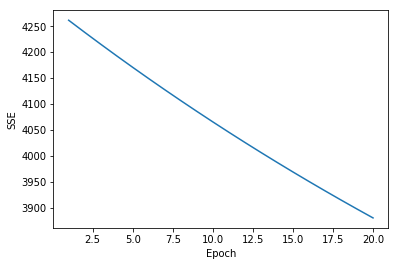

In [12]:
lreg = LinearRegressionGD(eta=0.000001)
lreg.fit(x_std, y_std)
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [13]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

Slope: 0.089
Intercept: 0.000


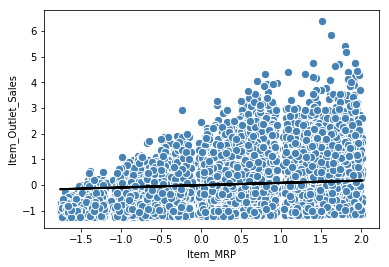

In [14]:
print('Slope: %.3f' % lreg.w_[1])
print('Intercept: %.3f' % lreg.w_[0])

lin_regplot(x_std, y_std, lreg)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Slope: 15.625
Intercept: -9.847
Accuracy: 0.32


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


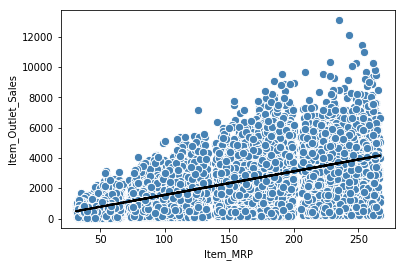

In [15]:
# Using sklearn

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xa_train, ya_train)
y_pred = slr.predict(x_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

print('Accuracy: %.2f' % slr.score(xa_test, ya_test))

lin_regplot(x, y, slr)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Slope: 0.575
Intercept: 0.010
Accuracy: 0.31


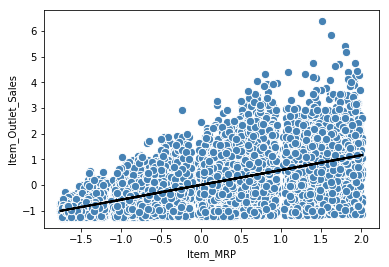

In [16]:
slr = LinearRegression()
slr.fit(x_train, y_train)
y_pred = slr.predict(x_test)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

print('Accuracy: %.2f' % slr.score(x_test, y_test))

lin_regplot(x_std, y_std, slr)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Slope: 0.575
Intercept: 0.010
Accuracy: 0.31


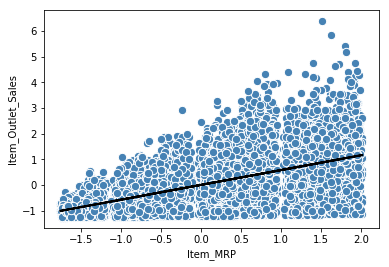

In [17]:
# Ridge regression

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=0.1)
rdg.fit(x_train, y_train)
y_pred = rdg.predict(x_test)
print('Slope: %.3f' % rdg.coef_[0])
print('Intercept: %.3f' % rdg.intercept_)

print('Accuracy: %.2f' % rdg.score(x_test, y_test))

lin_regplot(x_std, y_std, rdg)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Slope: 0.475
Intercept: 0.009
Accuracy: 0.31


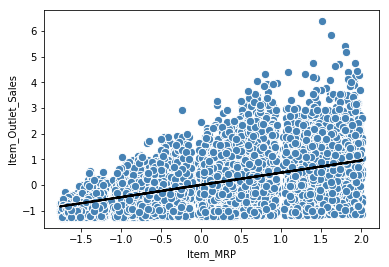

In [18]:
# Lasso regression

from sklearn.linear_model import Lasso

las = Lasso(alpha=0.1)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

print('Slope: %.3f' % las.coef_[0])
print('Intercept: %.3f' % las.intercept_)

print('Accuracy: %.2f' % las.score(x_test, y_test))

lin_regplot(x_std, y_std, las)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [19]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,)
x, y = x_std, y_std
ransac.fit(x,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

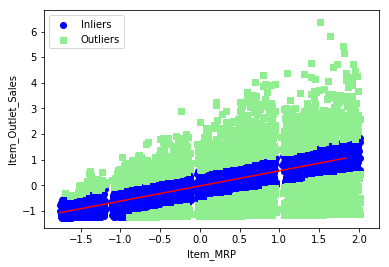

In [20]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(x.min(), x.max(),1.8)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(x[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers') 
plt.scatter(x[outlier_mask], y[outlier_mask],c='lightgreen', marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'upper left')
plt.show()

In [21]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)
print('Score: %.3f' % ransac.score(x,y))

Slope: 0.592
Intercept: -0.025
Score: 0.321
